Programming Assignment :  Regression

Course Advisor: Prof. S.R.M. Prasanna

Course TA's: Jagabandhu Mishra (183081002@iitdh.ac.in) and 
             Seema K. (173021001@iitdh.ac.in)


Regression:

Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following.

1) Fitting of line (one variable learning)

2) Fitting of line (two variable learning) 

3) Fitting of a plane (two variable)

4) Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

5) Polynomial regression

6) Pratical example of regression task (salary prediction)

# 1) Fitting of line

a) Generation of line data ($y=w_{1}x+w_{0}$)

i) Generate x, 1000 points from 0-1.

ii) Take $w_{0}=10$ and $w_{1}=1$ and generate y

iii) Plot (x,y)



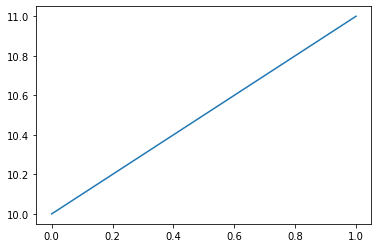

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# write your code here
x=np.array([i/1000 for i in list(range(0,1001))])
y=x+10
plt.plot(x,y)


b) Corrupt the data using uniformly sampled random noise.

i) Generate random numbers uniformly from (0-1) with same size as y.

ii) Corrupt y and generate $y_{cor}$ by adding the generated randomsamples with a weight of 0.1.

iii) Plot (x,$y_{cor}$) (use scatter plot)

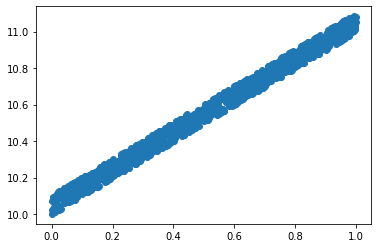

In [ ]:
# write your code here
yc=[]
for i in y:
  yc.append(i+random.randint(0, 10)/100)
plt.scatter(x,yc)

c)  Curve prediction using hurestic way.

i) Keep $w_{0}=10$ as constant and find $w_{1}$ ?

ii) Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that.

iii) Find $y_{pred}$ using each value of $w_{1}$.

iv) The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$.

$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{cor_{i}}-y_{pred_{i}})^2$$

v) Plot error vs srch_$w1$

vi) First plot the scatter plot (x,$y_{cor}$) , over that plot (x,$y_{bestpred}$).

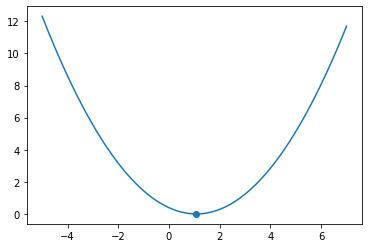

In [ ]:
# implementation of heurastic search for 1 variable case
# write your code here
def J(E):
  return np.mean(np.square(E))
def e(x,ycc,w1):
  return (ycc-(x*w1+10))
j1=[]
ycc=np.array(yc)
ww=np.array(range(-500,701))/100
for i in ww:
  E=e(x,ycc,i)
  j1.append(J(E))
m=j1.index(min(j1))

plt.plot(ww,j1)
plt.scatter(ww[m],j1[m])

d) Gradient descent

i) $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{cori}-(w_{0}+w_{1}x_{i}))^2$

ii) $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}}) \times x_{i}$

iii) $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}}) \times x_{i}$

w1== 1.0018927741167702 error== 0.0035293208986855594


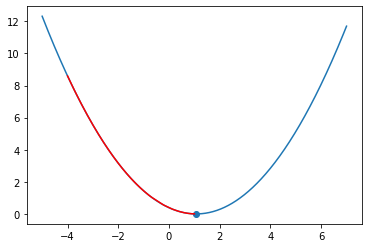

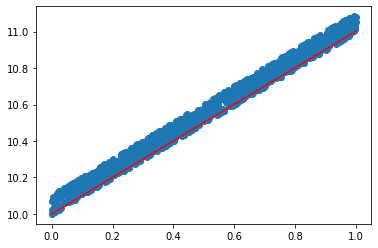

In [ ]:
# write your code here
def grad(E,x):
  return np.mean(np.matmul(E,x))*2
def up(w1,g,lam):
  return w1+lam*g

def fit(x,ycc,n=30,lam=.000081):
  w1=-4
  w=[w1]
  E=e(x,ycc,w1)
  j=[]
  j.append(J(E))
  # print("j==",j[-1],"w1==",w1," before loop")
  for i in range(1,n):
    # here im increasing lam since grad decreses as we aproch minima
    if(i%20==0 and i<21):
      lam=lam*5
    
    g=grad(E,x)
    # print("j==",j[-1],"w1==",w1,"grad==",g," start**********")
    w1=up(w1,g,lam)
    E=e(x,ycc,w1)
    j.append(J(E))
    w.append(w1)
    # print("j==",j[-1],"w1==",w1," ____________")
    
  print("w1==",w1,"error==",j[-1])
  return j,w

j,w=fit(x,ycc)
w1=w[-1]
plt.figure(1)
plt.plot(ww,j1)
plt.scatter(ww[m],j1[m])
plt.plot(w,j,"r")

plt.figure(2)
plt.scatter(x,yc)
y11=x*w1+10
plt.plot(x,y11,"r")

# 2) Fitting line with two unknown variables

a) Generation of line data ($y=w_{1}x+w_{0}$)

i) Generate x, 1000 points from 0-1.

ii) Take $w_{0}=5$ and $w_{1}=1.5$ and generate y

iii) Plot (x,y)

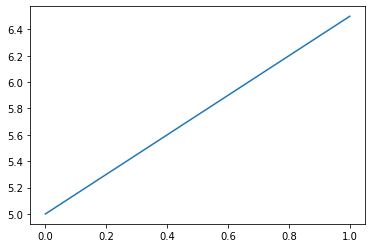

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
# write your code here
x1=np.array([[i/1000,1] for i in list(range(0,1001))])
x=np.array([[i/1000] for i in list(range(0,1001))])
w=np.array([[1.5],[5]])

y=np.matmul(x1,w)
plt.plot(x,y)
# x.shape

b) Corrupt the data using uniformly sampled random noise.

i) Generate random numbers uniformly from (0-1) with same size as y.

ii) Corrupt y and generate $y_{cor}$ by adding the generated randomsamples with a weight of 0.1.

iii) Plot (x,$y_{cor}$) (use scatter plot)

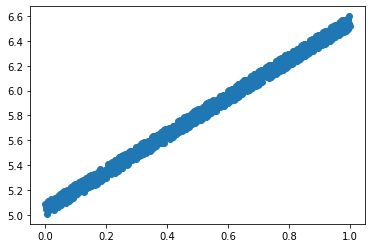

In [5]:
# write your code here

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

yc=[]
for i in y:
  yc.append(i+random.randint(0, 10)/100)
plt.scatter(x,yc)

ycc=np.array(yc)
def J(E):
  return np.mean(np.square(E))
def e(x1,ycc,w):
  return (ycc-(np.matmul(x1,w)))


c) Plot the error surface

we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)

i) take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface.

(256, 256)


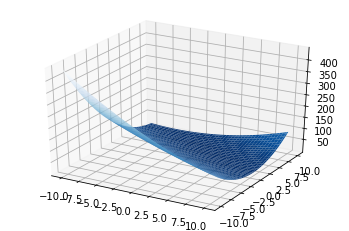

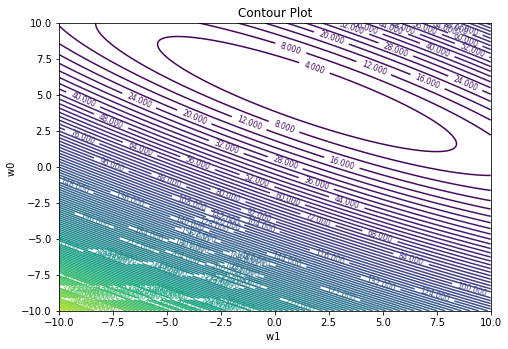

In [67]:
# write your code here

w11=np.linspace(-10, 10, 256)
w00=np.linspace(-10, 10, 256)
wX, wY = np.meshgrid(w11, w00)
JJ = np.array([J(e(x1,ycc,np.array([[w1], [w0]]))) for w1,w0 in zip(np.ravel(wX), np.ravel(wY))])
JJ=JJ.reshape(wX.shape)
print(JJ.shape)

fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot_surface(wX, wY, JJ, cmap="Blues_r")
plt.show()

fig = plt.figure("3")

left, bottom, width, height = 1, 1, 1, 1
ax = fig.add_axes([left, bottom, width, height]) 
cp = ax.contour(wX, wY, JJ,levels=np.arange(0,500,4))
ax.clabel(cp, inline=True, 
          fontsize=7.5)
ax.set_title('Contour Plot')
ax.set_xlabel('w1 ')
ax.set_ylabel('w0 ')
plt.show()

d) Gradient descent:

0.001023898735978333 [[1.4972569 ]
 [5.05231325]]


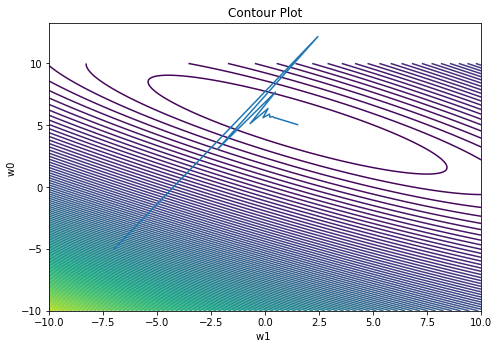

In [72]:

# Gradient descent
w1_init = -7 # initialization 
w0_init = -5
lr = 0.6  # learning rate (0.9 diverges, 0.6 quite interesting)
eps = 0.000001
# write your code here
W=np.array([[w1_init],[w0_init]])

# (np.matmul(x1,W)).shape

def Grad(E,x1):
  return ((np.matmul(E.T,x1))*0.002).T
def Up(W,g,lr):
  return W+lr*g
# (np.matmul(ycc.T,x1)).shape

# E=e(x1,ycc,W)
# print(W.shape)
# print(x1.shape)
# print(W-0.6*Grad(E,x1).T)
def fit(x1,W,ycc,eps=0.000001,lr=0.6):
  E=e(x1,ycc,W)
  j=J(E)
  ww1=[W[0]]
  ww0=[W[1]]
  i=0
  while i<126 :
    i+=1
    g=Grad(E,x1)
    W=Up(W,g,lr)
    ww1.append(W[0])
    ww0.append(W[1])
    E=e(x1,ycc,W)
    j=J(E)
  return j,W,ww1,ww0

jj,WW,ww1,ww0=fit(x1,W,ycc)

print(jj,WW)

fig = plt.figure("3")

left, bottom, width, height = 1, 1, 1, 1
ax = fig.add_axes([left, bottom, width, height]) 
cp = ax.contour(wX, wY, JJ,levels=np.arange(0,500,4))
# ax.clabel(cp, inline=True, 
#           fontsize=7.5)
ax.set_title('Contour Plot')
ax.set_xlabel('w1 ')
ax.set_ylabel('w0 ')
plt.plot(ww1,ww0)
plt.show()


#  3. Fitting of a plane (two variables)

Here, we will try to fit plane using multiveriate regression

i) Generate x1 and x2 from range -1 to 1, (30 samples)

ii) Equation of plane $y=w0+w1x1+w2x2$

iii) Here we will fix w0 and will learn w1 and w2 

(30, 30)


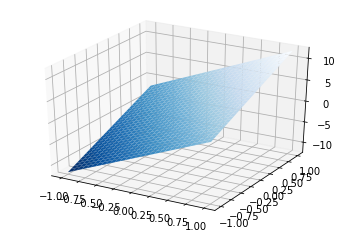

In [103]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt
import random

x1=np.linspace(-1,1,30)
x2=np.linspace(-1,1,30)
Xx1,Xx2=np.meshgrid(x1,x2)
w0=0
w1=7
w2=5
y=np.array([w0+w1*xx1+w2*xx2 for xx1,xx2 in zip(np.ravel(Xx1), np.ravel(Xx2))])
y1=y
y=y.reshape(Xx1.shape)
print(y.shape)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot_surface(Xx1, Xx2, y, cmap="Blues_r")
plt.show()
def e(w1,w2,Xx1,Xx2,y):
  ycc=np.array([w1*XX1+w2*XX2 for XX1,XX2 in zip(np.ravel(Xx1),np.ravel(Xx2))])
  return -(ycc-np.ravel(y)
def J(w1,w2,Xx1,Xx2,y):
  ycc=np.array([w1*XX1+w2*XX2 for XX1,XX2 in zip(np.ravel(Xx1),np.ravel(Xx2))])
  return np.mean(((ycc-np.ravel(y))**2))


b) Generate Error surface

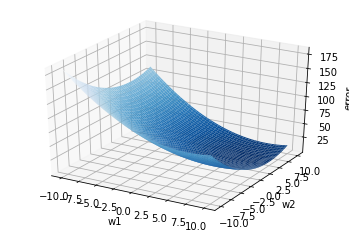

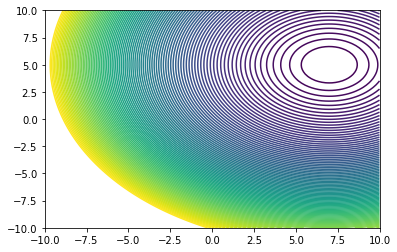

In [105]:
# write your code here
ww1=np.linspace(-10, 10, 100)
ww2=np.linspace(-10, 10, 100)

Ww1,Ww2=np.meshgrid(ww1,ww2)

JJ=np.array([J(w1,w2,Xx1,Xx2,y) for w1,w2 in zip(np.ravel(Ww1), np.ravel(Ww2))])
JJ = JJ.reshape(Ww1.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(Ww1,Ww2,JJ,cmap="Blues_r")
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('error')
plt.show()

fig = plt.figure()
plt.contour( Ww1,Ww2,JJ, levels=np.arange(0,100,1))

c) Gradient descent:

In [114]:
# write your code here
w1_init = -5 # initialization 
w0_init = -2
lr = 0.6  # learning rate (0.9 diverges, 0.6 quite interesting)
eps = 0.000001
# write your code here
W=np.array([[w1_init],[w0_init]])

# (np.matmul(x1,W)).shape

def Grad(E,Xx1):
  return (sum(-2*E*np.ravel(Xx1))/900)
def Up(W,g,lr):
  return W+lr*g

def fit(Xx1,Xx2,W,y,eps=0.000001,lr=0.6):
  E=e(W[0],W[1],Xx1,Xx2,y)
  j=J(W[0],W[1],Xx1,Xx2,y)
  ww0=[W[0]]
  ww1=[W[1]]
  i=0
  while i<26 :
    i+=1
    g1=Grad(e(W[0],W[1],Xx1,Xx2,y),Xx1)
    g2=Grad(e(W[0],W[1],Xx1,Xx2,y),Xx2)
    print(W[1],W[0],g1,g2,"before")
    W[1]=Up(W[1],g2,lr)
    W[0]=Up(W[0],g1,lr)
    print(W[1],W[0],"---------------")
    ww0.append(W[0])
    ww1.append(W[1])
    E=e(W[0],W[1],Xx1,Xx2,y)
    j=J(W[0],W[1],Xx1,Xx2,y)
  return j,W,ww1,ww0
JJJ,WWW,WWW1,WWW0=fit(Xx1,Xx2,W,y,eps=0.000001,lr=0.6)
# fig = plt.figure()
# plt.contour( Ww1,Ww2,JJ, levels=np.arange(0,100,1))
# plt.plot(WWW1,WWW0)
# print(JJJ,WWW1,WWW0)

[-2] [-5] -1.578983857244667e-17 -2.652692880171041e-15 before
[-2] [-5] ---------------
[-2] [-5] -1.578983857244667e-17 -2.652692880171041e-15 before
[-2] [-5] ---------------
[-2] [-5] -1.578983857244667e-17 -2.652692880171041e-15 before
[-2] [-5] ---------------
[-2] [-5] -1.578983857244667e-17 -2.652692880171041e-15 before
[-2] [-5] ---------------
[-2] [-5] -1.578983857244667e-17 -2.652692880171041e-15 before
[-2] [-5] ---------------
[-2] [-5] -1.578983857244667e-17 -2.652692880171041e-15 before
[-2] [-5] ---------------
[-2] [-5] -1.578983857244667e-17 -2.652692880171041e-15 before
[-2] [-5] ---------------
[-2] [-5] -1.578983857244667e-17 -2.652692880171041e-15 before
[-2] [-5] ---------------
[-2] [-5] -1.578983857244667e-17 -2.652692880171041e-15 before
[-2] [-5] ---------------
[-2] [-5] -1.578983857244667e-17 -2.652692880171041e-15 before
[-2] [-5] ---------------
[-2] [-5] -1.578983857244667e-17 -2.652692880171041e-15 before
[-2] [-5] ---------------
[-2] [-5] -1.57898385

# 4. Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

(5, 1000)
(6, 1)
(6, 1000)
(1000, 1)
[[1.0503822 ]
 [2.00120477]
 [3.00013879]
 [5.00088859]
 [8.99983254]
 [2.99989447]]
[[ 1.01547112]
 [-0.02431489]
 [ 0.03377968]
 [ 1.77826855]
 [-0.38849042]
 [-1.52395542]]


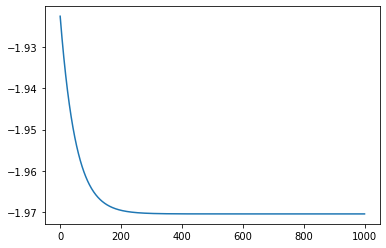

In [122]:
import numpy as np
import matplotlib.pyplot as plt

class regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    w=w_old+2*lr*(np.mean(y-np.matmul(x.T,w_old)))
   # write your code here
    return w

  def error(self,w,y,x):

    return np.mean((y-np.matmul(x.T,w)**2))
    # write your code here

  def mat_inv(self,y,x_aug):
    return np.matmul(np.linalg.inv(np.matmul(x_aug,x_aug.T)),np.matmul(x_aug,y))
    # write your code here
    # by Gradien descent
  def Regression_grad_des(self,x,y,lr):
    m,n=x.shape
    w=np.random.randn(m,1)
    e=[]
    for i in range(1000):
      e.append(self.error(w,y,x))
      w=self.grad_update(w,lr,y,x)
    w_pred=w
    # write your code here

    return w_pred,e


############################################################################################################
# Generation of data
sim_dim=5
sim_no_data=1000
x=np.random.uniform(-1,1,(sim_dim,sim_no_data))
print(x.shape)

w=np.array([[1],[2],[3],[5],[9],[3]]) # W=[w0,w1,.....,wM]'
print(w.shape)

# # augment feat

x_aug=np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
print(x_aug.shape)


y=x_aug.T @ w  # vector multiplication
print(y.shape)


## corrupted by noise
nois=np.random.uniform(0,1,y.shape)
y=y+0.1*nois

### the data (x_aug and y is generated)#####
###############################################################################################################
# by computation (Normal equation)
reg=regression()
w_opt=reg.mat_inv(y,x_aug)
print(w_opt)

# by Gradien descent
lr=0.01
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
print(w_pred)

plt.plot(err)
  

    

# 5. Polynomial regression:

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. fit the generated curve using different polynomial order. (Using matrix inversion, and Home work using gradient descent)

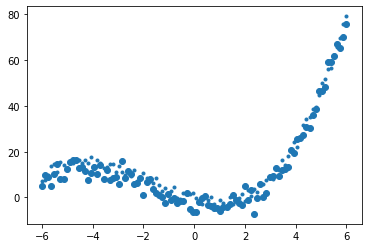

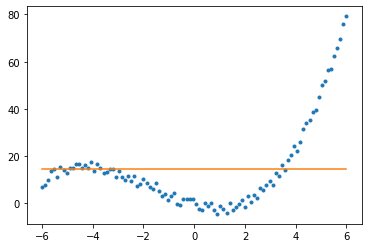

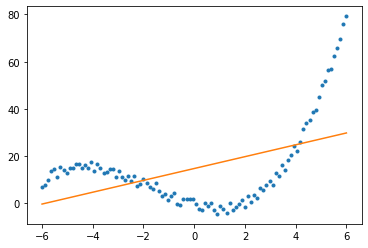

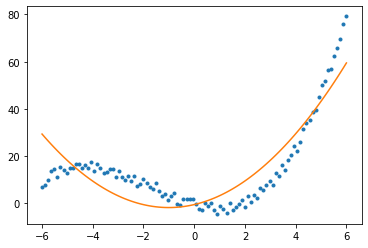

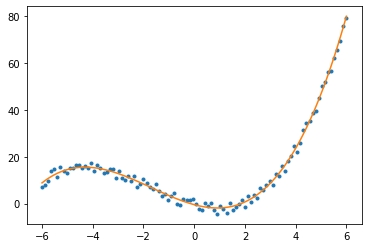

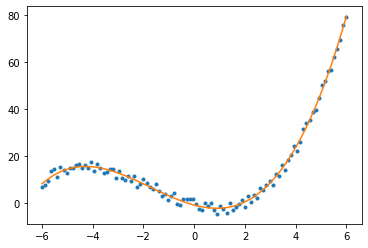

In [126]:
## data generation
w=np.array([0.25,1.25,-3,-3])
x=np.linspace(-6,6,100)
y=0.25*(x**3)+1.25*(x**2)-3*x-3
y=y+3*np.random.randn(100)
plt.scatter(x,y)
# write your code here

def data_transform(X,degree): 
 # write your code here  
  X_new=np.array([X**(degree-i) for i in range(degree+1)])
  return X_new


X=data_transform(x,3)

y=X.T @ w

y=y+5*np.random.uniform(0,1,y.shape)

plt.plot(x.T,y,'.')

reg=regression()

# by computation

# for degree 0 polynomial fitting
degree=0
X_1=data_transform(x,degree)
# print(X_1.shape)
w_mat=reg.mat_inv(y,X_1)
# print(y.shape)
# print(w_mat.shape)
y_pred=X_1.T @ w_mat
# print(y_pred.shape)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)


# for degree 1 polynomial fitting
degree=1
# write your code here (like degree 0)
X_1=data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)

# for degree 2 polynomial fitting
degree=2
# write your code here
X_1=data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)

# for degree 3 polynomial fitting
degree=3
# write your code here
X_1=data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)

# for degree 4 polynomial fitting
degree=4
# write your code here
X_1=data_transform(x,degree)
w_mat=reg.mat_inv(y,X_1)
y_pred=X_1.T @ w_mat
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)

# xx=np.linalg.pinv((X_1 @ X_1.T)) @ X_1 @ y
# print(xx.shape)

# 6: Practical example (salary prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Perform using matrix inversion and using Gradiant descent  method
4. find the mean square error in test. (as performance measure) 

In [ ]:
import numpy as np

# write your code here

# mean square error (testing) (normalized) #############

error=reg.error(w_pred,y_test,aug(x_test))/((np.max(y_test)-np.mean(y_test))**2)

print('Normalized testing error=',error,'\n')

print('predicted salary=',y_pred[0:3],'\n')
print('actual salary=',y_test[0:3])



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
Normalized training error= 0.02827224237168212 

Normalized testing error= 0.05534340421775587 

predicted salary= [[33469.35497582]
 [52694.83918006]
 [58642.13537189]] 

actual salary= [[28084.]
 [48940.]
 [62952.]]
